Perceptron Learning Algorithm (PLA) is designed for binary classification problems with only two data layers.

Suppose there are two labeled classes illustrated in the figure below corresponding to the set of blue points and the set of red points. The problem is that from the data of two given labeled sets, build a classifier capable of predicting the label (color) of a new data point, such as a gray point.

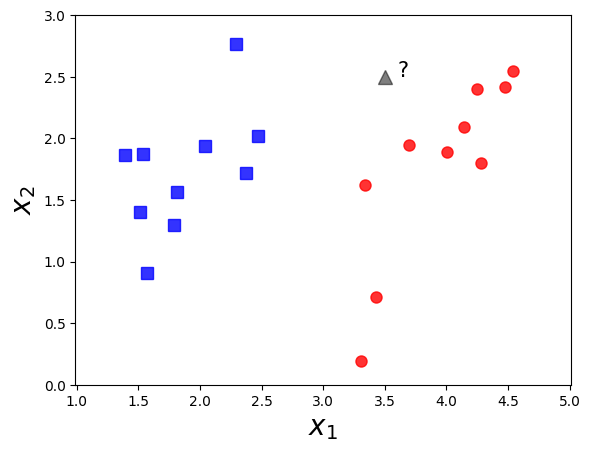

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.plot([3.5], [2.5], 'k^', markersize = 10, alpha = .5)
plt.text(3.6, 2.5, r'?', fontsize=15)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

plt.show()

The Perceptron problem is stated as follows: Given two labeled classes, find a straight line such that all points in class 1 lie on one side, all points in class 2 lie on the other side of the flat line with the assumption that there exists a flat line.

If there exists a straight line dividing two classes, we call those two classes *linear separation*. Classification algorithms that create boundaries as flat lines are collectively called Linear Classifiers.

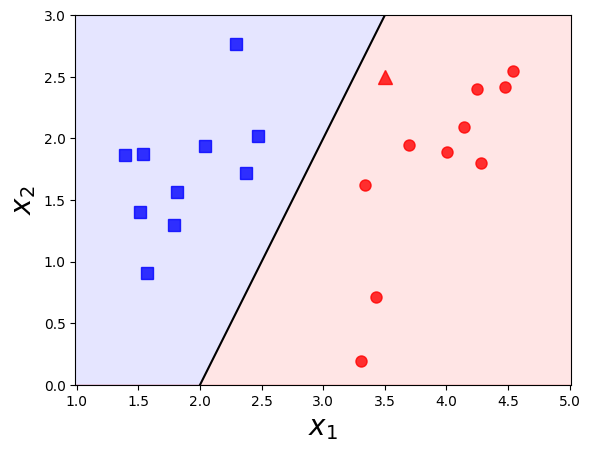

In [35]:
# plot points
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.plot([3.5], [2.5], 'r^', markersize = 10, alpha = .8)
plt.axis('equal')
# axis limits
plt.ylim(0, 3)
plt.xlim(2, 4)

# fill region colors
x1 = np.arange(-10, 10, .1)
y1 = 2 * x1 - 4
y2 = 10 * x1

plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha=.1)
plt.fill_between(x1, y1, y2, color = 'blue', alpha=.1)

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

plt.show()

## Perceptron algorithm

### Classification method of perceptron learning algorithm:

Suppose $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N]\in\mathbb{R}^{d\times N}$ is matrix containing training data points where each column $\mathbf{x}_i$ is a data point in $d$ dimensional space; the labels corresponding to each data point are stored in a row vector $\mathbf{y} = [y_1, y_2, \ldots, y_N]\in\mathbb{R}^{1\times N}$, with $y_i = 1$ if $\mathbf{x}_i$ belongs to the first layer (blue square) and $y_i = −1$ if $\mathbf{x}_i $ belongs to the remaining class (red circle).

At one point, suppose we find a hyperplane boundary with the equation:

$$f_{\mathbf{w}}(\mathbf{x}) = w_1x_1 + w_2x_2 + \ldots + w_dx_d + w_0 = \mathbf{w}^T\mathbf{x} + w_0 = 0$$

where $\mathbf{w}\in\mathbb{R}^d$ is the coefficient vector and $w_0$ is the bias free term. By using the [bias trick](https://github.com/letruongzzio/Machine-Learning/blob/main/2%20-%20Linear%20Regression%20and%20Overfitting/Linear%20Regression.ipynb), we can consider the hyperplane equation as $f_{\mathbf{w}}(\mathbf{x}) = \mathbf{w}^T\mathbf{x}$ with $\mathbf{x}$ here implicitly being the feature vector expands by one feature equal to $1$.

In two-dimensional space, suppose the straight line $w_1x_1 + w_2x_2 + w_0 = 0$ is the solution to be found as shown below. Note that points located on the same side of this line will make the function $f_{\mathbf{w}}(\mathbf{x})$ have the same sign. Just change the sign of $\mathbf{w}$ if necessary, we can assume that points located in the blue half-plane have a positive sign $(+)$, points in the red half-plane have a negative sign $(-)$. These signs are also equivalent to the label $\mathbf{y}$ of each class. So if $\mathbf{w}$ is a solution to the perceptron problem, with a new unlabeled data point $\mathbf{x}$, we can determine its label with a simple mathematical operation:

$$
\text{label}(\mathbf{x}) = 
\begin{cases} 
    1 & \text{if} \ \mathbf{w}^T\mathbf{x}\geq 0\\
    -1 & \text{o.w.}
\end{cases}
$$

More succinctly:

$$\text{label}(\mathbf{x}) = \text{sgn}(\mathbf{w}^T\mathbf{x})$$

where $\text{sgn}$ is the function that determines the sign, assuming that $\text{sgn}(0) = 1$.

### Build the loss function:

For example in two-dimensional space, suppose the line $w_1x_1 + w_2x_2 + w_0 = 0$ is given as below with the circled points being misclassified points. We always want that there are no points that are classified incorrectly. Naturally, we can use a function to count the number of points with erroneous classification and find a way to minimize this function.

Therefore, we will construct a loss function with any parameter $\mathbf{w}$. Consider any point $\mathbf{x}_i$ with label $y_i$. If it is misclassified, we must have $\text{sgn}(\mathbf{w}^T\mathbf{x})\neq y_i$. Since these two values are only equal to $1$ or $−1$, we will have $y_i\text{sgn}(\mathbf{w}^T\mathbf{x}) = -1$. Thus, the function that counts the number of points with erroneous classification can be written as

$$J'(\mathbf{w}) = \sum_{\mathbf{x}_i\in\mathcal{M}}(-y_i\text{sgn}(\mathbf{w}^T\mathbf{x}_i))$$

where $\mathcal{M}$ denotes the set of erroneously classified points corresponding to each $\mathbf{w}$. The ultimate goal is to find $\mathbf{w}$ so that no point is misclassified, that is, $J'(\mathbf{w}) = 0$. An important point is that this is a discrete function so it is very difficult to optimize. We need to find another loss function to make the optimization more feasible. Consider the loss function

$$J(\mathbf{w}) = \sum_{\mathbf{x}_i\in\mathcal{M}}(-y_i\mathbf{w}^T\mathbf{x}_i)$$

The function $J(\mathbf{w})$ tells us that when an error-classified point $\mathbf{x}_i$ is farther from the boundary, the value $-y_i\mathbf{w}^ T\mathbf{x}_i$ will be larger, meaning the loss function will be larger. Since the sum is still computed over the sets of erroneously classified points $\mathcal{M}$, the minimum value of this loss function is also zero if no points are erroneously classified. Therefore, $J(\mathbf{w})$ is said to be better than $J'(\mathbf{w})$ because it *punishes* very severely points that encroach into the other class's territory. Meanwhile, $J'(\mathbf{w})$ penalizes erroneous classification points by the same amount of $1$, regardless of whether they are close or far from the boundary.